<a href="https://colab.research.google.com/github/Soumyadantre/Health_prediction_model/blob/main/Python_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Sanskar Jain(0901 CS2201108),RAKHI SHERAWAT(0901CS201095),SOUMYA DATRE(0901CS201125),NITANSHI CHANDIL(0901CS201080),SAJAL SHRIVASTAVA(0901CS201104)
import pandas as pd
data = pd.read_csv("Health.csv")
data=data[0:105]
data.head()

,Name,Gender,BMI,AQI current resi.,AQI permanet resi,Addictive,Meditation,Covid,Family health issue,Doctor Visit,Junk Food,Physical activity,Health issue,Health Grade
0,Samaridhi Jain,Female,21.6,145.0,145.0,No,"Yes, Sometimes",No,4.0,As and when any problem arises,Daily,Walking,0.0,6.40625
1,Aditya khash,Male,23.1,145.0,145.0,No,"Yes, Sometimes",Yes,0.0,As and when any problem arises,Daily,Sports,0.0,7.50000
2,Utkarsh Mishra,Male,21.8,145.0,116.0,No,No,No,5.0,Do not visit,Once a week,Fitness Training,0.0,6.56250
3,Anshul singh tomar,Male,24.2,145.0,147.0,No,"Yes, Sometimes",No,0.0,Do not visit,Once a week,Walking,0.0,8.28125
4,HarshVardhan Singh,Male,23.3,145.0,145.0,No,No,No,0.0,As and when any problem arises,Once a week,Jogging,0.0,8.43750


In [ ]:
data[['Gender','Addictive','Meditation','Doctor Visit','Junk Food','Physical activity','Covid']].head()

,Gender,Addictive,Meditation,Doctor Visit,Junk Food,Physical activity,Covid
0,Female,No,"Yes, Sometimes",As and when any problem arises,Daily,Walking,No
1,Male,No,"Yes, Sometimes",As and when any problem arises,Daily,Sports,Yes
2,Male,No,No,Do not visit,Once a week,Fitness Training,No
3,Male,No,"Yes, Sometimes",Do not visit,Once a week,Walking,No
4,Male,No,No,As and when any problem arises,Once a week,Jogging,No


In [ ]:
# Replacing string values to numbers
data['Gender'].replace({'Male':0, 'Female':1},inplace=True)
data['Addictive'].replace({'Yes':1,'No':0,'Maybe':2},inplace=True)
data['Meditation'].replace({'Yes':2, 'Yes, Sometimes':1, 'no':0},inplace=True)
data['Doctor Visit'].replace({'Do not visit':0, 'As and when any problem arises':1, 'As per the scheduled appointments':2},inplace=True)
data['Junk Food'].replace({'Daily':2, 'Once a week':1, 'Once a month':0},inplace=True)
data['Meditation'].replace({'Yes, Sometimes':2, 'Daily':1, 'No':0},inplace=True)
data['Covid'].replace({'Yes':1,'No':0},inplace=True)




In [ ]:
# features
X = data[['Gender', 'BMI', 'Addictive','Meditation','Covid','Doctor Visit','Junk Food']]
# predicted variable
Y = data['Health Grade']

In [ ]:
X.head()

,Gender,BMI,Addictive,Meditation,Covid,Doctor Visit,Junk Food
0,1,21.6,0,1,0,1,2
1,0,23.1,0,1,1,1,2
2,0,21.8,0,0,0,0,1
3,0,24.2,0,1,0,0,1
4,0,23.3,0,0,0,1,1


In [ ]:
# importing train_test_split model
from sklearn.model_selection import train_test_split
# splitting train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.9,random_state=0)

In [ ]:
X_train

,Gender,BMI,Addictive,Meditation,Covid,Doctor Visit,Junk Food
97,0,27.6,0,1,0,0,0
51,1,21.7,0,1,0,1,1
13,0,21.5,0,1,1,1,0
7,0,19.6,0,1,0,1,0
30,1,18.1,0,1,0,1,1
...,...,...,...,...,...,...,...
101,1,24.5,0,1,0,1,0
67,0,16.8,0,1,0,1,0
64,1,20.2,2,1,0,1,1
47,1,17.9,0,0,0,0,1


In [ ]:
#Train and Test the model
# importing the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Fit linear model by passing training dataset
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
X_test

,Gender,BMI,Addictive,Meditation,Covid,Doctor Visit,Junk Food
26,1,20.9,0,1,1,1,1
61,1,25.0,0,0,0,0,1
2,0,21.8,0,0,0,0,1
62,1,19.4,0,1,0,1,0
85,0,20.0,0,0,0,1,1
48,0,24.6,0,1,0,1,1
16,0,24.9,0,1,0,1,1
100,0,22.1,1,0,0,1,2
56,0,22.4,0,0,0,1,2
45,1,21.5,0,0,0,1,1


In [ ]:
# Predicting the target variable for test datset
predictions = model.predict(X_test)
predictions

array([6.96019872, 6.24853891, 6.59720762, 8.00071355, 7.50832961,
       7.72467992, 7.71001071, 7.1007691 , 7.17701145, 7.24278642,
       7.17760681])

In [ ]:
Y_test

26     6.09375
61     4.21875
2      6.56250
62     8.59375
85     7.96875
48     8.43750
16     8.43750
100    6.09375
56     6.56250
45     6.87500
66     8.28125
Name: Health Grade, dtype: float64

Text(0, 0.5, 'Predicted Y')

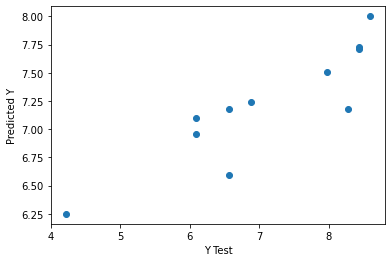

In [ ]:
# Comparing the results
import matplotlib.pyplot as plt
plt.scatter(Y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


In [ ]:
# accuracy
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)
r2_score = regressor.score(X_test,Y_test)
print(r2_score)

0.512641256708513


In [ ]:
# calculate errors
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(Y_test, predictions))

0.8380018422185832


In [ ]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(Y_test, predictions), 2))
print("Mean squared error =", round(sm.mean_squared_error(Y_test, predictions), 2))
print("Median absolute error =", round(sm.median_absolute_error(Y_test, predictions), 2))
print("Explain variance score =", round(sm.explained_variance_score(Y_test, predictions), 2))
print("R2 score =", round(sm.r2_score(Y_test, predictions), 2))

Mean absolute error = 0.77
Mean squared error = 0.84
Median absolute error = 0.71
Explain variance score = 0.52
R2 score = 0.51
